<a href="https://colab.research.google.com/github/dsdayat/Clustering-K-Means-Pake-PCA/blob/main/HW_Unsupervised_Clustering_Agus_Nur_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [476]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [477]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Our Dataset

In [478]:
df = pd.read_csv('flight.csv')
pd.set_option('display.max_columns', None)#to see full dataframe (non truncated)
df.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


There is Blank Misiing Value on work_city feature that may undetected in isna

In [479]:
df.columns= df.columns.str.strip().str.lower()

In [480]:
df['work_city'] = df['work_city'].apply(pd.to_numeric, errors='coerce')# handling blank missing value

In [481]:
df.head(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,11/2/2006,12/24/2008,Male,6,NaN,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,NaN,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,NaN,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,NaN,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


## Data Preprocessing

In [482]:
df.isna().sum() * 100 / len(df)

member_no             0.000000
ffp_date              0.000000
first_flight_date     0.000000
gender                0.004763
ffp_tier              0.000000
work_city            99.982536
work_province         5.156538
work_country          0.041278
age                   0.666794
load_time             0.000000
flight_count          0.000000
bp_sum                0.000000
sum_yr_1              0.874770
sum_yr_2              0.219089
seg_km_sum            0.000000
last_flight_date      0.000000
last_to_end           0.000000
avg_interval          0.000000
max_interval          0.000000
exchange_count        0.000000
avg_discount          0.000000
points_sum            0.000000
point_notflight       0.000000
dtype: float64

*There are many missing value in the data*
- under 1% missing value feature are ['gender','work_country','age','sum_yr_1','sum_yr_2']
- 1% up to 5% missing value feature are ['work_city','work_province']
-99% work citties missing value, the feature will be drop since the data is enough from the work_country

In [483]:
df=df[~df['gender'].isna()]

In [484]:
df=df[~df['work_country'].isna()]

In [485]:
df=df[~df['age'].isna()]

In [486]:
df=df[~df['sum_yr_1'].isna()]

In [487]:
df=df[~df['sum_yr_2'].isna()]

In [488]:
df=df.drop(['work_city'], axis=1)

In [489]:
df=df[~df['work_province'].isna()]

In [490]:
df.isna().sum() * 100 / len(df)

member_no            0.0
ffp_date             0.0
first_flight_date    0.0
gender               0.0
ffp_tier             0.0
work_province        0.0
work_country         0.0
age                  0.0
load_time            0.0
flight_count         0.0
bp_sum               0.0
sum_yr_1             0.0
sum_yr_2             0.0
seg_km_sum           0.0
last_flight_date     0.0
last_to_end          0.0
avg_interval         0.0
max_interval         0.0
exchange_count       0.0
avg_discount         0.0
points_sum           0.0
point_notflight      0.0
dtype: float64

*The missing Value Succesfully handled by removing the rows that have missing value*

In [491]:
df.duplicated().sum()

0

*There is no Duplicated Data*

%%time
from numpy.core import numerictypes
plt.figure(figsize=(15,5))

features = df.columns.unique()
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='yellow')
    plt.tight_layout()

In [492]:
df.describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000
mean,31518.637343,4.106252,42.235314,12.079068,11099.617410,5380.987953,5708.397688,17380.374811,171.059731,67.924411,167.332783,0.329583,0.720920,12782.429945,2.837285
std,18191.135508,0.381026,9.762330,14.253188,16402.101874,8148.107660,8750.404129,21035.488167,180.489790,77.527783,122.891253,1.156752,0.184025,20711.316398,7.511708
min,3.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15758.500000,4.000000,35.000000,3.000000,2610.500000,1018.000000,850.000000,4908.500000,28.000000,23.678571,81.000000,0.000000,0.612407,2880.000000,0.000000
50%,31567.000000,4.000000,41.000000,7.000000,5837.000000,2813.000000,2850.000000,10245.000000,104.000000,44.800000,144.000000,0.000000,0.711658,6501.000000,0.000000
75%,47279.500000,4.000000,48.000000,15.000000,13053.000000,6602.500000,6975.000000,21614.000000,258.000000,82.000000,228.000000,0.000000,0.808483,14573.000000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


- Difference count between mean and 50% are ['flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum','last_to_end','avg_interval','max_interval','points_sum','point_notflight']
- We can drop member no, it not necessary since it has various data of the number member


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58747 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          58747 non-null  int64  
 1   ffp_date           58747 non-null  object 
 2   first_flight_date  58747 non-null  object 
 3   gender             58747 non-null  object 
 4   ffp_tier           58747 non-null  int64  
 5   work_province      58747 non-null  object 
 6   work_country       58747 non-null  object 
 7   age                58747 non-null  float64
 8   load_time          58747 non-null  object 
 9   flight_count       58747 non-null  int64  
 10  bp_sum             58747 non-null  int64  
 11  sum_yr_1           58747 non-null  float64
 12  sum_yr_2           58747 non-null  float64
 13  seg_km_sum         58747 non-null  int64  
 14  last_flight_date   58747 non-null  object 
 15  last_to_end        58747 non-null  int64  
 16  avg_interval       587

In [494]:
df.isna().sum() * 100 / len(df)

member_no            0.0
ffp_date             0.0
first_flight_date    0.0
gender               0.0
ffp_tier             0.0
work_province        0.0
work_country         0.0
age                  0.0
load_time            0.0
flight_count         0.0
bp_sum               0.0
sum_yr_1             0.0
sum_yr_2             0.0
seg_km_sum           0.0
last_flight_date     0.0
last_to_end          0.0
avg_interval         0.0
max_interval         0.0
exchange_count       0.0
avg_discount         0.0
points_sum           0.0
point_notflight      0.0
dtype: float64

In [495]:
df=df[~df['last_flight_date'].isna()]

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58747 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          58747 non-null  int64  
 1   ffp_date           58747 non-null  object 
 2   first_flight_date  58747 non-null  object 
 3   gender             58747 non-null  object 
 4   ffp_tier           58747 non-null  int64  
 5   work_province      58747 non-null  object 
 6   work_country       58747 non-null  object 
 7   age                58747 non-null  float64
 8   load_time          58747 non-null  object 
 9   flight_count       58747 non-null  int64  
 10  bp_sum             58747 non-null  int64  
 11  sum_yr_1           58747 non-null  float64
 12  sum_yr_2           58747 non-null  float64
 13  seg_km_sum         58747 non-null  int64  
 14  last_flight_date   58747 non-null  object 
 15  last_to_end        58747 non-null  int64  
 16  avg_interval       587

In [497]:
df.head(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,11/2/2006,12/24/2008,Male,6,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


There is blank missing value in work city 

# Data type correction

In [498]:
df['ffp_date']=df['ffp_date'].astype('datetime64')
df['first_flight_date']=df['first_flight_date'].astype('datetime64')
df['load_time']=df['load_time'].astype('datetime64')
df['last_flight_date']= pd.to_datetime(df['last_flight_date'], errors='coerce')
df['gender']=df['gender'].astype('category')
df['work_province']=df['work_province'].astype('category')
df['work_country']=df['work_country'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58747 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          58747 non-null  int64         
 1   ffp_date           58747 non-null  datetime64[ns]
 2   first_flight_date  58747 non-null  datetime64[ns]
 3   gender             58747 non-null  category      
 4   ffp_tier           58747 non-null  int64         
 5   work_province      58747 non-null  category      
 6   work_country       58747 non-null  category      
 7   age                58747 non-null  float64       
 8   load_time          58747 non-null  datetime64[ns]
 9   flight_count       58747 non-null  int64         
 10  bp_sum             58747 non-null  int64         
 11  sum_yr_1           58747 non-null  float64       
 12  sum_yr_2           58747 non-null  float64       
 13  seg_km_sum         58747 non-null  int64         
 14  last_f

- *All feature were on clear dtype*

In [499]:
dfori=df.copy()

In [500]:
# lebih detil breakdownnya juga include cylinder
df.groupby(['ffp_tier','gender']).agg(
    distinct_name = ('work_country','count'),
    
)

distinct_name
ffp_tier gender               
4        Female          13297
         Male            40683
5        Female            473
         Male             2819
6        Female            155
         Male             1320

- Berdasarkan data, variasi customer di dunia  di dominasi pria kurang lebih 2x lipat dibanding wanita pada setiap level membership. 
- level membership 4 paling banyak membernya.

In [501]:
df.head(3)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,beijing,CN,31.0,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,beijing,CN,42.0,2014-03-31,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,beijing,CN,40.0,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26


In [502]:
df.describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000
mean,31518.637343,4.106252,42.235314,12.079068,11099.617410,5380.987953,5708.397688,17380.374811,171.059731,67.924411,167.332783,0.329583,0.720920,12782.429945,2.837285
std,18191.135508,0.381026,9.762330,14.253188,16402.101874,8148.107660,8750.404129,21035.488167,180.489790,77.527783,122.891253,1.156752,0.184025,20711.316398,7.511708
min,3.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15758.500000,4.000000,35.000000,3.000000,2610.500000,1018.000000,850.000000,4908.500000,28.000000,23.678571,81.000000,0.000000,0.612407,2880.000000,0.000000
50%,31567.000000,4.000000,41.000000,7.000000,5837.000000,2813.000000,2850.000000,10245.000000,104.000000,44.800000,144.000000,0.000000,0.711658,6501.000000,0.000000
75%,47279.500000,4.000000,48.000000,15.000000,13053.000000,6602.500000,6975.000000,21614.000000,258.000000,82.000000,228.000000,0.000000,0.808483,14573.000000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


*Since the data have so many unique, We can make simply the data by dropping categorical data and not valuable data the other feature such as 'member_no', 'work_city', 'work_province', 'work_country'*
and for clustering, the date time data type is not necessary for this case.




In [503]:
df=df.drop(['member_no', 'work_province','load_time', 'work_country','ffp_date', 'first_flight_date','last_flight_date'], axis=1)#drop 

In [504]:
df.columns.unique()

Index(['gender', 'ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1',
       'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval',
       'exchange_count', 'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58747 entries, 0 to 62986
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gender           58747 non-null  category
 1   ffp_tier         58747 non-null  int64   
 2   age              58747 non-null  float64 
 3   flight_count     58747 non-null  int64   
 4   bp_sum           58747 non-null  int64   
 5   sum_yr_1         58747 non-null  float64 
 6   sum_yr_2         58747 non-null  float64 
 7   seg_km_sum       58747 non-null  int64   
 8   last_to_end      58747 non-null  int64   
 9   avg_interval     58747 non-null  float64 
 10  max_interval     58747 non-null  int64   
 11  exchange_count   58747 non-null  int64   
 12  avg_discount     58747 non-null  float64 
 13  points_sum       58747 non-null  int64   
 14  point_notflight  58747 non-null  int64   
dtypes: category(1), float64(5), int64(9)
memory usage: 6.8 MB


In [506]:
df.columns.unique()

Index(['gender', 'ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1',
       'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval',
       'exchange_count', 'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

In [507]:
m=df.columns.unique()
for i in m:
  print(i,df[i].unique())

gender ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
ffp_tier [6 5 4]
age [ 31.  42.  40.  64.  48.  46.  50.  43.  34.  47.  58.  45.  63.  54.
  41.  49.  69.  39.  62.  55.  53.  37.  51.  59.  76.  38.  60.  52.
  44.  30.  33.  28.  67.  57.  35.  70.  66.  56.  61.  36.  78.  32.
  74.  68.  65.  27.  72.  71.  79.  25.  29.  21.  26.  18.  19.  73.
  77.  15.  16.  75.  24.  12.  23.  14.  20.  22.  89.  80.  81.  83.
  82.  84.  13.  17.  86. 110.   7.  85.   6.  92.  88.   9.  91.]
flight_count [210 140 135  23 152  92 101  73  64  43 145  29 118  50  22  38 106  94
  20  62 213  74  87  53  95 131  25  24  54 166  81  98  35  46 110 134
 107  70 189  48  68 111  69 126  55  76  77  84  96  30  85  32  34 197
  18 149  61  36 102 127  56  79  97 158  51  88  42 129  67  12 100  17
  90 146  33 142  31  21  16  71 130  89  83  99  40  52  65  66  27 193
  14  57  19 108 113 109 120  45  80  82  39 125 116  58 180 103  13 123
  47  49  86  60  59 122  72 124  26 

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58747 entries, 0 to 62986
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gender           58747 non-null  category
 1   ffp_tier         58747 non-null  int64   
 2   age              58747 non-null  float64 
 3   flight_count     58747 non-null  int64   
 4   bp_sum           58747 non-null  int64   
 5   sum_yr_1         58747 non-null  float64 
 6   sum_yr_2         58747 non-null  float64 
 7   seg_km_sum       58747 non-null  int64   
 8   last_to_end      58747 non-null  int64   
 9   avg_interval     58747 non-null  float64 
 10  max_interval     58747 non-null  int64   
 11  exchange_count   58747 non-null  int64   
 12  avg_discount     58747 non-null  float64 
 13  points_sum       58747 non-null  int64   
 14  point_notflight  58747 non-null  int64   
dtypes: category(1), float64(5), int64(9)
memory usage: 6.8 MB


In [509]:
#onehot encoding 
onehot_columns = ['gender']
df = pd.get_dummies(df, columns = onehot_columns)

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58747 entries, 0 to 62986
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ffp_tier         58747 non-null  int64  
 1   age              58747 non-null  float64
 2   flight_count     58747 non-null  int64  
 3   bp_sum           58747 non-null  int64  
 4   sum_yr_1         58747 non-null  float64
 5   sum_yr_2         58747 non-null  float64
 6   seg_km_sum       58747 non-null  int64  
 7   last_to_end      58747 non-null  int64  
 8   avg_interval     58747 non-null  float64
 9   max_interval     58747 non-null  int64  
 10  exchange_count   58747 non-null  int64  
 11  avg_discount     58747 non-null  float64
 12  points_sum       58747 non-null  int64  
 13  point_notflight  58747 non-null  int64  
 14  gender_Female    58747 non-null  uint8  
 15  gender_Male      58747 non-null  uint8  
dtypes: float64(5), int64(9), uint8(2)
memory usage: 6.8 MB


In [511]:
df.head(3)

,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,gender_Female,gender_Male
0,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50,0,1
1,6,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33,0,1
2,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26,0,1


In [512]:
df.describe()

,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,gender_Female,gender_Male
count,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000,58747.000000
mean,4.106252,42.235314,12.079068,11099.617410,5380.987953,5708.397688,17380.374811,171.059731,67.924411,167.332783,0.329583,0.720920,12782.429945,2.837285,0.237033,0.762967
std,0.381026,9.762330,14.253188,16402.101874,8148.107660,8750.404129,21035.488167,180.489790,77.527783,122.891253,1.156752,0.184025,20711.316398,7.511708,0.425267,0.425267
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,3.000000,2610.500000,1018.000000,850.000000,4908.500000,28.000000,23.678571,81.000000,0.000000,0.612407,2880.000000,0.000000,0.000000,1.000000
50%,4.000000,41.000000,7.000000,5837.000000,2813.000000,2850.000000,10245.000000,104.000000,44.800000,144.000000,0.000000,0.711658,6501.000000,0.000000,0.000000,1.000000
75%,4.000000,48.000000,15.000000,13053.000000,6602.500000,6975.000000,21614.000000,258.000000,82.000000,228.000000,0.000000,0.808483,14573.000000,1.000000,0.000000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000,1.000000,1.000000


- OK data reasonable ada penumpang 6 tahun sampai 110 tahun
- mean dan 50% nya OK ga jauh bedanya
- count nya sama , its mean there is no missing value

**PCA**

In [513]:
x = df.drop('ffp_tier', axis=1)
y = df['ffp_tier']

In [514]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(df)
pcs = pca.transform(df)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7','pc8','pc9', 'pc10', 'pc11', 'pc12','pc13', 'pc14','pc15'])
pdf['ffp_tier'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,ffp_tier
0,1.016977e+06,38533.416885,-30603.454341,-19258.755412,4214.267352,759.726433,1288.607639,121.698532,-39.950699,111.807113,-66.885109,16.648932,-0.473384,3.360004,1.150718,6.0
1,6.327780e+05,91870.234476,-41788.704812,-73173.303057,1373.048885,251.723226,510.043526,44.538419,-28.215601,40.533711,-35.069673,17.061091,-0.005798,2.743087,1.823666,6.0
2,6.139536e+05,92148.768990,-36670.064124,-71450.517840,1865.163291,272.754639,507.598304,38.773079,-27.957518,45.129487,-28.807548,8.622964,0.043693,2.649493,1.795475,6.0
3,5.676263e+05,72329.747572,-19729.550773,-49309.752460,-41040.693562,231.516936,372.726300,26.642847,4.317488,84.710312,-67.399508,2.355165,-0.408308,1.866605,1.651503,5.0
4,5.382178e+05,27612.659590,-10621.860631,-13580.830309,1753.256033,399.828880,610.259539,55.999774,-11.117201,23.399949,-19.658060,16.658129,-0.144865,1.482007,0.604104,6.0


In [515]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [1.16614605e+09 6.54202323e+07 2.40366894e+07 2.05060273e+07
 7.33987540e+06 3.17470775e+04 1.17437661e+04 2.06953618e+03
 9.44462241e+01 4.32213615e+01 3.60451650e+01 8.24919569e-01
 3.48970557e-01 8.11948736e-02 2.25515491e-02]
Explained variance ratio: [9.08571054e-01 5.09703989e-02 1.87275343e-02 1.59767147e-02
 5.71866475e-03 2.47348740e-05 9.14983673e-06 1.61242296e-06
 7.35852128e-08 3.36747510e-08 2.80836122e-08 6.42713698e-10
 2.71890940e-10 6.32607826e-11 1.75704276e-11]


In [516]:
9.08571054e-01+ 5.09703989e-02

0.9595414529

<BarContainer object of 15 artists>

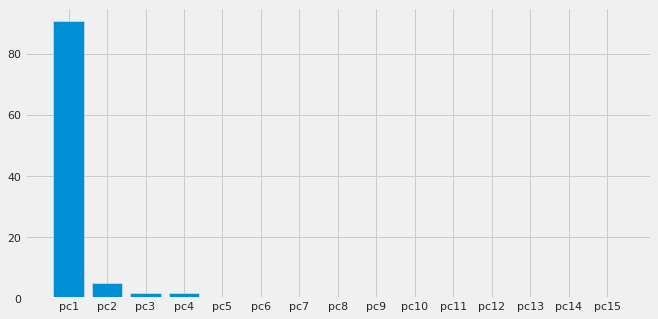

In [517]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7','pc8','pc9', 'pc10', 'pc11', 'pc12','pc13', 'pc14','pc15'], pca.explained_variance_ratio_ * 100)

pilih pc 2

In [518]:
pca = PCA(n_components=2)#n componetn itu nilai pc nya 
pca.fit(df)
pcs = pca.transform(df)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
X_std_pca['ffp_tier'] = y
X_std_pca.head()

,pc1,pc2,ffp_tier
0,1.016977e+06,38533.416885,6.0
1,6.327780e+05,91870.234476,6.0
2,6.139536e+05,92148.768990,6.0
3,5.676263e+05,72329.747572,5.0
4,5.382178e+05,27612.659590,6.0


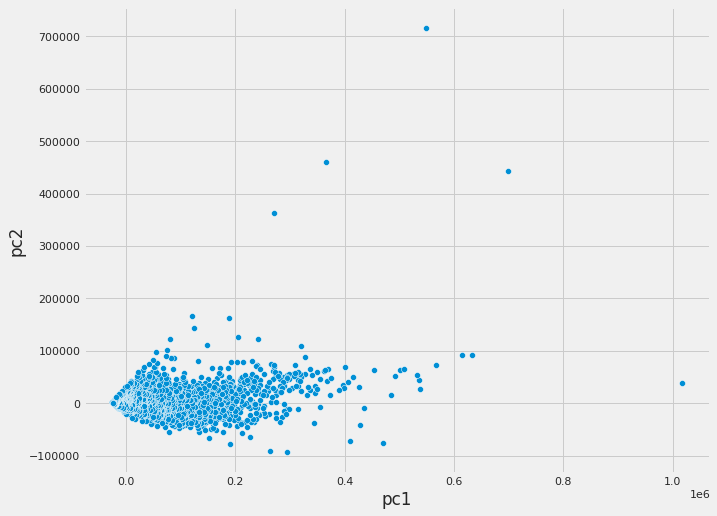

In [519]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=X_std_pca, x='pc1', y='pc2')

## Standarisasi Fitur

In [520]:
xst= X_std_pca.drop('ffp_tier', axis=1)
yst = X_std_pca['ffp_tier']

In [521]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xst)
xa = scaler.transform(xst)

In [525]:
xstd = pd.DataFrame(data = xa, columns = xst.columns.unique())
X_std_pca['ffp_tier'] = y
xstd.head()

,pc1,pc2
0,29.780939,4.764147
1,18.530137,11.358539
2,17.978886,11.392976
3,16.622246,8.942616
4,15.761056,3.413940


## Clustering

### Evaluasi/simulasi K-means

In [526]:
# inertia

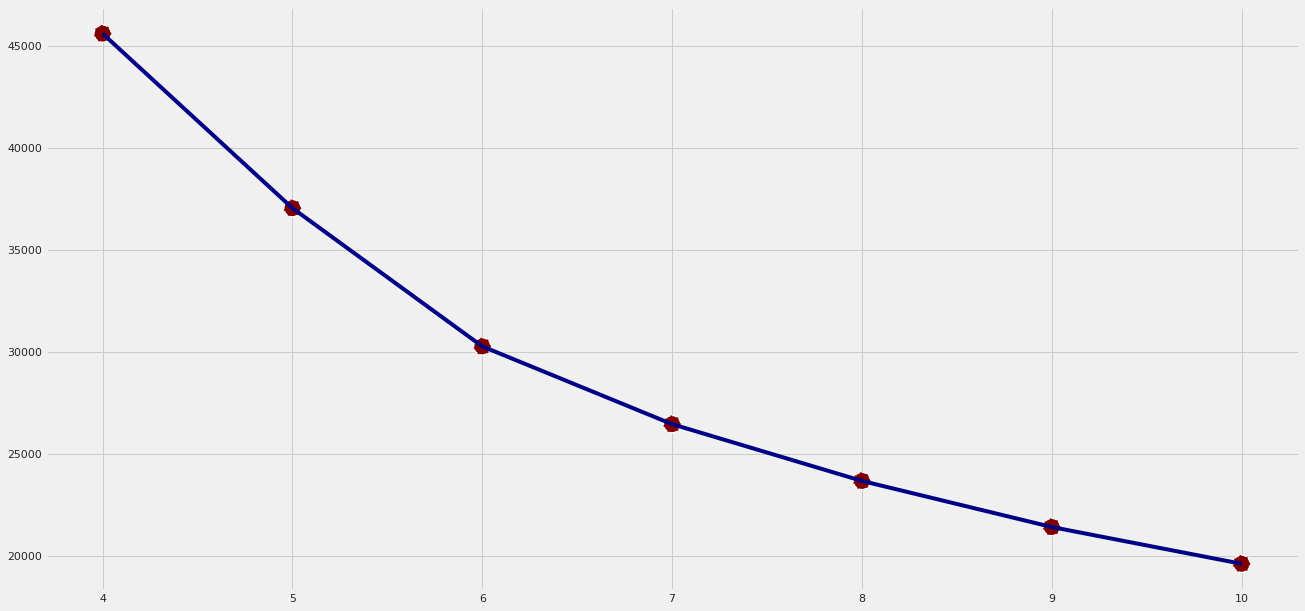

In [527]:
from sklearn.cluster import KMeans
inertia = []

for i in range(4, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(xstd.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(4, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(4, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [528]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(xstd.values)

KMeans(n_clusters=6, random_state=0)

In [539]:
df['cluster'] = kmeans.labels_

In [533]:
X_std_pca['ffp_tier'] = y

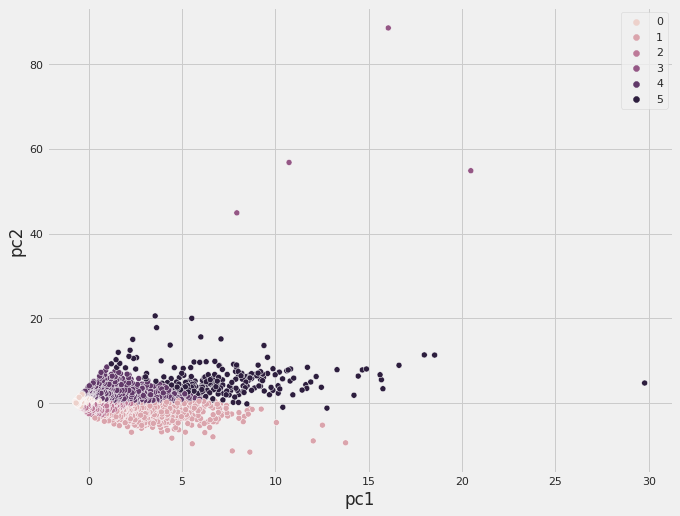

In [541]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=xstd, x='pc1', y='pc2', 
                hue=kmeans.labels_)

In [ ]:
### Bandingkan hasil dengan target

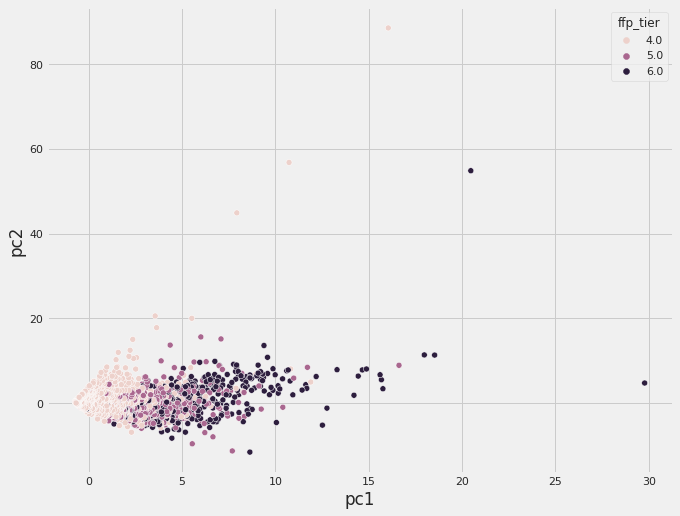

In [542]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=xstd, x='pc1', y='pc2', 
                hue=y)

Insight

- Persebaran cluster membership 4 mendominasi tapi nilai kordinat pc1 dan pc2 cenderung rendah, kategori kelas 4 ini merupakan customer yang fare nya tidak terlalu jauh, dan menghasilkan profit paling rendah
- Persebaran cluster membership 5 tidak dominan tapi nilai kordinat pc1 jauh namun pc 2 nya rendah, kategori kelas 5 ini merupakan customer yang fare nya lumayan jauh, dan menghasilkan profit paling lumayan banyak
- Persebaran cluster membership 6 tidak dominan tapi nilai kordinat pc1 jauh bahkan ada yang sangat jauh namun pc 2 nya rendah dan ada sedikit yang sangat jauh, kategori kelas 6 ini merupakan customer yang fare nya sangat jauh, dan menghasilkan profit paling sangat banyak

